## Ensemble Deep Learning 3 Classes

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# The setup

import os
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from skimage import io
from skimage import transform, io
from os import listdir
from sklearn.model_selection import train_test_split

In [23]:
# Function for support

def show_most_simm(Xs, fig_row, fig_col, sz=20, show=True):
    plt.figure(figsize=(sz,sz))
    plt.imshow(Xs[0])
    for i in range(0, ((fig_row * fig_col)+1)):
        try:
            plt.axis('off')
            plt.subplot(fig_row, fig_col, i+1)   
            if len(Xs[i].shape) == 3:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1], Xs[i].shape[2])), cmap="gray")
            else:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1])), cmap="gray")
        except:
            print("Error")
            pass
    if show:
        plt.show()

def displaytext(x,indexs, N=5):
    s = ""
    for i in range(5):
        if x+i == len(indexs):
            break
        s += str(i+x)+ "[" +str(indexs[x+i]) +']\t\t'
    print(s)

def show_index(index0, Xs, N=5):
    NP = len(index0)
    print(NP)
    extra = 1
    if NP % N==0:
        extra = 0
    for i in range(len(index0)//N + extra):
        x = i*N
        displaytext(x, index0)
        show_most_simm(Xs[index0][x:x+N], 1, N, sz=20)

def show(cate, ys, Xs, N=5):
    index0 = np.where(ys==cate)[0]
    show_index(index0[:N*N], Xs, N)

# Function read images from folder
#
def read_folder(path_class):
    file_names = listdir(path_class)
    names = []
    shapes = []
    images = []
    for fn in sorted(file_names):
        if not '.jpg' in fn:
            continue
        #print(fn)
        path_file = path_class + '/' + fn
        #print(path_file)
        img = io.imread(path_file)
        io.imshow(img)
        #print(img.shape)
        names.append(fn)
        shapes.append(img.shape)
        images.append(img)
        #break 
    return names, shapes, images

# Function to split image
#
def create_divided_images(X):
    sub_images = []
    N = X.shape[1]//X.shape[0]
    #print(N)
    width = X.shape[1]//N
    for i in range(N):
        #print(i, i*width, (i+1)*width)
        sx = X[:, i*width:(i+1)*width, :]
        #print(sx.shape)
        sub_images.append(sx)
        #io.imshow(sx)
        #io.show()
    return sub_images

def create_all_sub_images(Xs):
    images = []
    for i in range(len(Xs)):
        X = Xs[i]
        sx = create_divided_images(X)
        images.extend(sx)
    return images

In [24]:
#####################################################
#
# Create CNN Public Model

import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense
from keras.applications import MobileNetV2, DenseNet121, EfficientNetB1, ResNet101V2, InceptionResNetV2

def create_model(model_name, num_classes, input_shape=(224, 224, 3) ):
    input = tf.keras.layers.Input(input_shape)
    input_new = tf.keras.layers.Conv2D(3, 1, padding='same')(input)
    input_shape = (input_shape[0], input_shape[1], 3)

    if model_name == "MobileNetV2":
        input_shape = (input_shape[0], input_shape[1], 3)
        input_new = tf.keras.layers.Lambda(  
            lambda image: tf.image.resize( 
            image, 
            (224, 224)
        ))(input_new)
        input_shape = (224, 224, 3)
        x = MobileNetV2(include_top=False,
                  weights='imagenet',
                  input_shape=input_shape,
                  pooling='avg')(input_new)

    if model_name == "DenseNet121":
        input_shape = (input_shape[0], input_shape[1], 3)
        input_new = tf.keras.layers.Lambda(  
            lambda image: tf.image.resize( 
            image, 
            (224, 224)
        ))(input_new)
        input_shape = (224, 224, 3)
        x = DenseNet121(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape,
                        pooling='avg')(input_new)
    
    if model_name == "EfficientNetB1":
        input_shape = (input_shape[0], input_shape[1], 3)
        input_new = tf.keras.layers.Lambda(  
            lambda image: tf.image.resize( 
            image, 
            (224, 224)
        ))(input_new)
        input_shape = (224, 224, 3)
        x = EfficientNetB1(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape,
                        pooling='avg')(input_new)

    if model_name == "ResNet101V2":
        input_shape = (input_shape[0], input_shape[1], 3)
        input_new = tf.keras.layers.Lambda(  
            lambda image: tf.image.resize( 
            image, 
            (224, 224)
        ))(input_new)
        input_shape = (224, 224, 3)
        x = ResNet101V2(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape,
                        pooling='avg')(input_new)

    if model_name == "InceptionResNetV2":
        input_shape = (input_shape[0], input_shape[1], 3)
        input_new = tf.keras.layers.Lambda(  
            lambda image: tf.image.resize( 
            image, 
            (224, 224)
        ))(input_new)
        input_shape = (224, 224, 3)
        x = InceptionResNetV2(include_top=False,
                        weights='imagenet',
                        input_shape=input_shape,
                        pooling='avg')(input_new)

    output = Dense(num_classes, activation="softmax")(x)
    model = Model(input, output)
    return model

In [25]:
# google
path = '/content/drive/MyDrive/FSW_Data/Lab_Data_Training/'
path_checkpoint_dir = '/content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/'

!ls '/content/drive/MyDrive/FSW_Data/Lab_Data_Training/'

# Model parameters
epochs = 200

Good_Weld  Pass_Weld  Poor_Weld


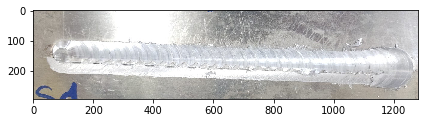

In [26]:
path_class = path + "Good_Weld"
a_names, a_shapes, a_images = read_folder(path_class)
path_class = path + "Pass_Weld"
p_names, p_shapes, p_images = read_folder(path_class)
path_class = path + "Poor_Weld"
l_names, l_shapes, l_images = read_folder(path_class)

In [27]:
len(a_images), len(p_images), len(l_images)

(47, 32, 53)

In [28]:
a_images[0].shape

(721, 3757, 3)

In [29]:
sa_images = create_all_sub_images(a_images)
sp_images = create_all_sub_images(p_images)
sl_images = create_all_sub_images(l_images)

print(len(sa_images), len(a_images))
print(len(sp_images), len(p_images))
print(len(sl_images), len(l_images))

192 47
161 32
214 53


Error


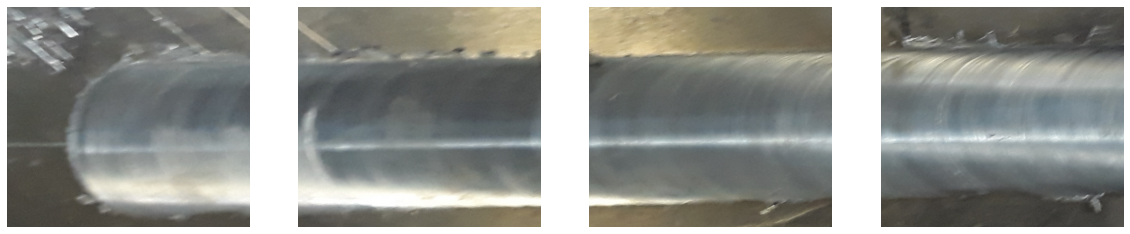

In [30]:
# show good welding

show_most_simm(sa_images[10:], 1, 4)

Error


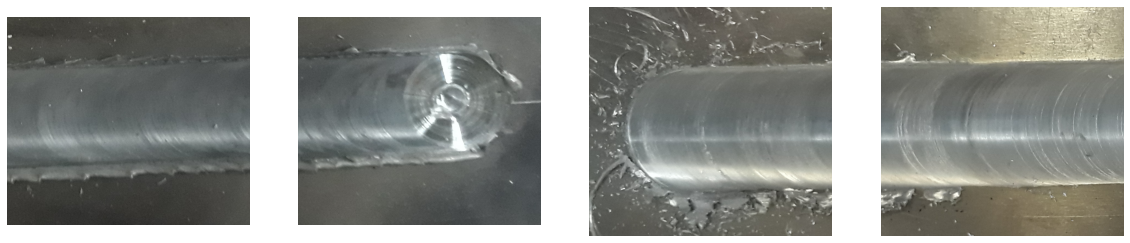

In [31]:
# show pass welding

show_most_simm(sp_images[10:], 1, 4)

Error


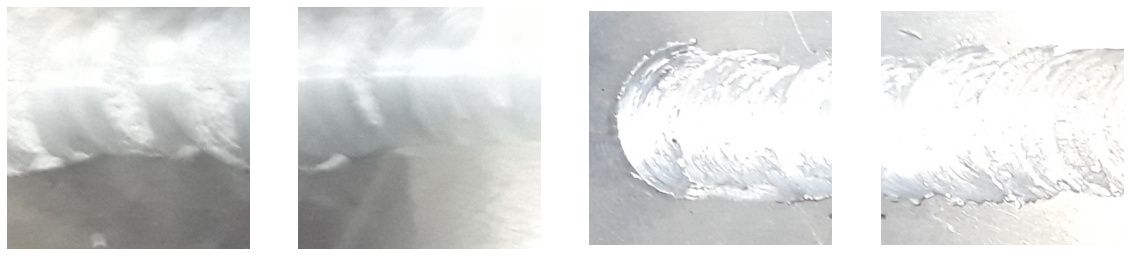

In [32]:
#show poor welding

show_most_simm(sl_images[10:], 1, 4)

In [33]:
print(len(sa_images), len(a_images))
print(len(sp_images), len(p_images))
print(len(sl_images), len(l_images))

all_images = []
all_images.extend(sa_images)
all_images.extend(sp_images)
all_images.extend(sl_images)
ys = []
ys.extend(list(np.zeros(len(sa_images))))
ys.extend(list(np.ones(len(sp_images))))
ys.extend(list(2*np.ones(len(sl_images))))
len(ys), len(all_images)

Xs = []
all_shapes = []
N = 224
for i in range(len(all_images)):
    img = all_images[i]
    rimg = transform.resize(img, (N, N))
    Xs.append(rimg)

Xs = np.array(Xs)

192 47
161 32
214 53


In [34]:
ys = np.array(ys)
Xs.shape, ys.shape

((567, 224, 224, 3), (567,))

In [35]:
#
# Image augmentation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=[0.75, 1.25],
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    brightness_range=[0.2,1.0],
    horizontal_flip=True,
    fill_mode="nearest")
datagenNo = ImageDataGenerator()

In [36]:
datagenflowAug = datagen.flow(Xs[:32]*255, ys[:32], 32, shuffle=True)
datagenflowNo = datagenNo.flow(Xs[:32]*255, ys[:32], 32, shuffle=True)

In [37]:
#
# Enhance image augmentation

import cv2
import albumentations as A
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import Sequence

from skimage import transform

import matplotlib.pyplot as plt

class AugmentDataGenerator(Sequence):
    def __init__(self, datagen, augment=None):
        self.datagen = datagen
        if augment is None:
            self.augment = A.Compose([])
        else:
            self.augment = augment

    def __len__(self):
        return len(self.datagen)

    def __getitem__(self, x):
        images, rest = self.datagen[x]
        images = images.astype(np.uint8)
        augmented = []
        for image in images:
            #before = np.mean(image)
            image = self.augment(image=image)['image']
            augmented.append(image)

        return np.array(augmented), rest

In [38]:
M = 150
albs = A.OneOf([
    A.Compose([
        #A.CLAHE(p = 0.2),
        #A.GaussNoise(p = 0.3, var_limit = (0.0, 50)),
        #A.GlassBlur (p =0.1, sigma=0.1, max_delta=1, iterations=2, always_apply=False, mode='fast'),
        #A.MedianBlur (blur_limit=9, always_apply=False, p=0.8),
        #A.CoarseDropout(p = 0.5, max_holes = 5, max_height=50, max_width=50),
        A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.4, 0.4), p=0.5),
        #A.HueSaturationValue(p=0.5,hue_shift_limit=0.2*M, sat_shift_limit=0.2*M, val_shift_limit=0.2*M),
        #A.RGBShift(p=0.8, r_shift_limit=0.2*M, g_shift_limit=0.2*M, b_shift_limit=0.2*M)
    ], p=0.5),

    A.Compose([], p=0.5)
])

Noalbs = A.Compose([], p=1)

augdatagen = AugmentDataGenerator(datagenflowAug, albs)
augdatagen2 = AugmentDataGenerator(datagenflowNo, Noalbs)

(32, 224, 224, 3)
1 (32, 224, 224, 3)
Error


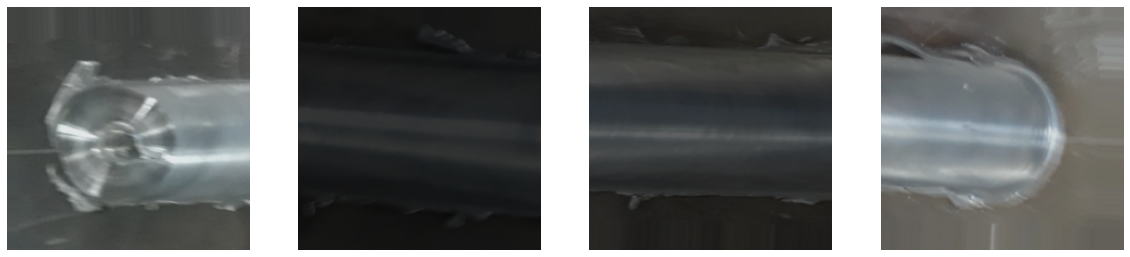

251

In [39]:
#
# Show image after augmentation

i = 0
images = []
nn = 0
for batch in augdatagen:
    i += 1
    print(batch[0].shape)
    nn += len(batch[0])
    images.append(batch[0])
    if i == 1:
        break

images[0] = images[0].astype(np.uint8).reshape( images[0].shape[:])
print(len(images), images[0].shape)
show_most_simm(images[0], 1, 4,sz=20)
np.max(images[0])

Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 1.1771 - accuracy: 0.3974
Epoch 1: val_accuracy improved from -inf to 0.40351, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 66s 2s/step - loss: 1.1771 - accuracy: 0.3974 - val_loss: 3.8376 - val_accuracy: 0.4035
Epoch 2/200
29/29 [==============================] - ETA: 0s - loss: 1.0643 - accuracy: 0.4592
Epoch 2: val_accuracy did not improve from 0.40351
29/29 [==============================] - 9s 307ms/step - loss: 1.0643 - accuracy: 0.4592 - val_loss: 1.6144 - val_accuracy: 0.3860
Epoch 3/200
29/29 [==============================] - ETA: 0s - loss: 0.9763 - accuracy: 0.5475
Epoch 3: val_accuracy did not improve from 0.40351
29/29 [==============================] - 9s 319ms/step - loss: 0.9763 - accuracy: 0.5475 - val_loss: 1.2190 - val_accuracy: 0.3860
Epoch 4/200
29/29 [==============================] - ETA: 0s - loss: 0.8867 - accuracy: 0.6049
Epoch 4: val_accuracy improved from 0.40351 to 0.42105, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 55s 2s/step - loss: 0.8867 - accuracy: 0.6049 - val_loss: 1.0785 - val_accuracy: 0.4211
Epoch 5/200
29/29 [==============================] - ETA: 0s - loss: 0.8057 - accuracy: 0.6225
Epoch 5: val_accuracy did not improve from 0.42105
29/29 [==============================] - 9s 309ms/step - loss: 0.8057 - accuracy: 0.6225 - val_loss: 0.9942 - val_accuracy: 0.4211
Epoch 6/200
29/29 [==============================] - ETA: 0s - loss: 0.7844 - accuracy: 0.6556
Epoch 6: val_accuracy improved from 0.42105 to 0.50000, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 56s 2s/step - loss: 0.7844 - accuracy: 0.6556 - val_loss: 0.9694 - val_accuracy: 0.5000
Epoch 7/200
29/29 [==============================] - ETA: 0s - loss: 0.7099 - accuracy: 0.7196
Epoch 7: val_accuracy improved from 0.50000 to 0.52632, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 57s 2s/step - loss: 0.7099 - accuracy: 0.7196 - val_loss: 0.9575 - val_accuracy: 0.5263
Epoch 8/200
29/29 [==============================] - ETA: 0s - loss: 0.7193 - accuracy: 0.7130
Epoch 8: val_accuracy improved from 0.52632 to 0.55263, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 56s 2s/step - loss: 0.7193 - accuracy: 0.7130 - val_loss: 0.9143 - val_accuracy: 0.5526
Epoch 9/200
29/29 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.7329
Epoch 9: val_accuracy did not improve from 0.55263
29/29 [==============================] - 10s 340ms/step - loss: 0.6472 - accuracy: 0.7329 - val_loss: 0.9060 - val_accuracy: 0.5526
Epoch 10/200
29/29 [==============================] - ETA: 0s - loss: 0.5821 - accuracy: 0.7925
Epoch 10: val_accuracy improved from 0.55263 to 0.57895, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 55s 2s/step - loss: 0.5821 - accuracy: 0.7925 - val_loss: 0.9064 - val_accuracy: 0.5789
Epoch 11/200
29/29 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.7550
Epoch 11: val_accuracy improved from 0.57895 to 0.60526, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 56s 2s/step - loss: 0.5904 - accuracy: 0.7550 - val_loss: 0.9203 - val_accuracy: 0.6053
Epoch 12/200
29/29 [==============================] - ETA: 0s - loss: 0.5526 - accuracy: 0.7881
Epoch 12: val_accuracy did not improve from 0.60526
29/29 [==============================] - 9s 312ms/step - loss: 0.5526 - accuracy: 0.7881 - val_loss: 0.9319 - val_accuracy: 0.5789
Epoch 13/200
29/29 [==============================] - ETA: 0s - loss: 0.5030 - accuracy: 0.8212
Epoch 13: val_accuracy did not improve from 0.60526
29/29 [==============================] - 9s 319ms/step - loss: 0.5030 - accuracy: 0.8212 - val_loss: 0.9020 - val_accuracy: 0.5702
Epoch 14/200
29/29 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.7947
Epoch 14: val_accuracy did not improve from 0.60526
29/29 [==============================] - 9s 313ms/step - loss: 0.5300 - accuracy: 0.7947 - val_loss: 0.9188 - val_accuracy: 0.5526
Epoch 15/200
29/29 [==============

29/29 [==============================] - 56s 2s/step - loss: 0.4362 - accuracy: 0.8411 - val_loss: 0.8648 - val_accuracy: 0.6316
Epoch 17/200
29/29 [==============================] - ETA: 0s - loss: 0.3816 - accuracy: 0.8742
Epoch 17: val_accuracy did not improve from 0.63158
29/29 [==============================] - 9s 302ms/step - loss: 0.3816 - accuracy: 0.8742 - val_loss: 0.8605 - val_accuracy: 0.5965
Epoch 18/200
29/29 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.8366
Epoch 18: val_accuracy did not improve from 0.63158
29/29 [==============================] - 9s 320ms/step - loss: 0.4146 - accuracy: 0.8366 - val_loss: 0.8576 - val_accuracy: 0.5877
Epoch 19/200
29/29 [==============================] - ETA: 0s - loss: 0.3982 - accuracy: 0.8675
Epoch 19: val_accuracy did not improve from 0.63158
29/29 [==============================] - 9s 307ms/step - loss: 0.3982 - accuracy: 0.8675 - val_loss: 0.8818 - val_accuracy: 0.5965
Epoch 20/200
29/29 [==============

29/29 [==============================] - 56s 2s/step - loss: 0.3900 - accuracy: 0.8653 - val_loss: 0.8719 - val_accuracy: 0.6404
Epoch 21/200
29/29 [==============================] - ETA: 0s - loss: 0.3706 - accuracy: 0.8698
Epoch 21: val_accuracy did not improve from 0.64035
29/29 [==============================] - 9s 317ms/step - loss: 0.3706 - accuracy: 0.8698 - val_loss: 0.9277 - val_accuracy: 0.6228
Epoch 22/200
29/29 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8786
Epoch 22: val_accuracy did not improve from 0.64035
29/29 [==============================] - 10s 323ms/step - loss: 0.3479 - accuracy: 0.8786 - val_loss: 0.9496 - val_accuracy: 0.6316
Epoch 23/200
29/29 [==============================] - ETA: 0s - loss: 0.3164 - accuracy: 0.8830
Epoch 23: val_accuracy did not improve from 0.64035
29/29 [==============================] - 10s 338ms/step - loss: 0.3164 - accuracy: 0.8830 - val_loss: 0.8976 - val_accuracy: 0.6316
Epoch 24/200
29/29 [============

29/29 [==============================] - 56s 2s/step - loss: 0.2991 - accuracy: 0.9095 - val_loss: 0.8847 - val_accuracy: 0.6579
Epoch 25/200
29/29 [==============================] - ETA: 0s - loss: 0.3128 - accuracy: 0.8918
Epoch 25: val_accuracy improved from 0.65789 to 0.68421, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 56s 2s/step - loss: 0.3128 - accuracy: 0.8918 - val_loss: 0.9000 - val_accuracy: 0.6842
Epoch 26/200
29/29 [==============================] - ETA: 0s - loss: 0.2595 - accuracy: 0.9272
Epoch 26: val_accuracy did not improve from 0.68421
29/29 [==============================] - 9s 310ms/step - loss: 0.2595 - accuracy: 0.9272 - val_loss: 0.9318 - val_accuracy: 0.6842
Epoch 27/200
29/29 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.9095
Epoch 27: val_accuracy did not improve from 0.68421
29/29 [==============================] - 10s 327ms/step - loss: 0.2709 - accuracy: 0.9095 - val_loss: 0.9213 - val_accuracy: 0.6491
Epoch 28/200
29/29 [==============================] - ETA: 0s - loss: 0.2546 - accuracy: 0.9183
Epoch 28: val_accuracy did not improve from 0.68421
29/29 [==============================] - 9s 312ms/step - loss: 0.2546 - accuracy: 0.9183 - val_loss: 0.9266 - val_accuracy: 0.6579
Epoch 29/200
29/29 [=============

29/29 [==============================] - 55s 2s/step - loss: 0.1824 - accuracy: 0.9338 - val_loss: 0.9370 - val_accuracy: 0.7018
Epoch 37/200
29/29 [==============================] - ETA: 0s - loss: 0.1545 - accuracy: 0.9558
Epoch 37: val_accuracy did not improve from 0.70175
29/29 [==============================] - 9s 304ms/step - loss: 0.1545 - accuracy: 0.9558 - val_loss: 0.9365 - val_accuracy: 0.6842
Epoch 38/200
29/29 [==============================] - ETA: 0s - loss: 0.1586 - accuracy: 0.9603
Epoch 38: val_accuracy did not improve from 0.70175
29/29 [==============================] - 9s 319ms/step - loss: 0.1586 - accuracy: 0.9603 - val_loss: 0.9297 - val_accuracy: 0.6842
Epoch 39/200
29/29 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9448
Epoch 39: val_accuracy did not improve from 0.70175
29/29 [==============================] - 9s 309ms/step - loss: 0.1518 - accuracy: 0.9448 - val_loss: 0.9532 - val_accuracy: 0.7018
Epoch 40/200
29/29 [==============

29/29 [==============================] - 55s 2s/step - loss: 0.1130 - accuracy: 0.9625 - val_loss: 1.0856 - val_accuracy: 0.7105
Epoch 55/200
29/29 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9691
Epoch 55: val_accuracy did not improve from 0.71053
29/29 [==============================] - 10s 321ms/step - loss: 0.0840 - accuracy: 0.9691 - val_loss: 1.0820 - val_accuracy: 0.6930
Epoch 56/200
29/29 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.9757
Epoch 56: val_accuracy did not improve from 0.71053
29/29 [==============================] - 9s 318ms/step - loss: 0.0818 - accuracy: 0.9757 - val_loss: 1.1226 - val_accuracy: 0.6842
Epoch 57/200
29/29 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9868
Epoch 57: val_accuracy did not improve from 0.71053
29/29 [==============================] - 9s 313ms/step - loss: 0.0658 - accuracy: 0.9868 - val_loss: 1.0640 - val_accuracy: 0.7018
Epoch 58/200
29/29 [=============

29/29 [==============================] - 55s 2s/step - loss: 0.0771 - accuracy: 0.9757 - val_loss: 1.0956 - val_accuracy: 0.7193
Epoch 65/200
29/29 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9823
Epoch 65: val_accuracy improved from 0.71930 to 0.72807, saving model to /content/drive/MyDrive/FSW_Data/1029_Checkpoint_3/ResNet101V2_4.tf


29/29 [==============================] - 57s 2s/step - loss: 0.0615 - accuracy: 0.9823 - val_loss: 1.0786 - val_accuracy: 0.7281
Epoch 66/200
29/29 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 0.9823
Epoch 66: val_accuracy did not improve from 0.72807
29/29 [==============================] - 9s 318ms/step - loss: 0.0595 - accuracy: 0.9823 - val_loss: 1.1431 - val_accuracy: 0.6754
Epoch 67/200
29/29 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9735
Epoch 67: val_accuracy did not improve from 0.72807
29/29 [==============================] - 9s 308ms/step - loss: 0.0749 - accuracy: 0.9735 - val_loss: 1.1676 - val_accuracy: 0.6842
Epoch 68/200
29/29 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9757
Epoch 68: val_accuracy did not improve from 0.72807
29/29 [==============================] - 9s 312ms/step - loss: 0.0617 - accuracy: 0.9757 - val_loss: 1.1556 - val_accuracy: 0.7018
Epoch 69/200
29/29 [==============

29/29 [==============================] - 55s 2s/step - loss: 0.0615 - accuracy: 0.9845 - val_loss: 1.1042 - val_accuracy: 0.7456
Epoch 84/200
29/29 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9845
Epoch 84: val_accuracy did not improve from 0.74561
29/29 [==============================] - 9s 302ms/step - loss: 0.0446 - accuracy: 0.9845 - val_loss: 1.1160 - val_accuracy: 0.7368
Epoch 85/200
29/29 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9757
Epoch 85: val_accuracy did not improve from 0.74561
29/29 [==============================] - 9s 321ms/step - loss: 0.0577 - accuracy: 0.9757 - val_loss: 1.0930 - val_accuracy: 0.7281
Epoch 86/200
29/29 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9934
Epoch 86: val_accuracy did not improve from 0.74561
29/29 [==============================] - 9s 310ms/step - loss: 0.0476 - accuracy: 0.9934 - val_loss: 1.0837 - val_accuracy: 0.7368
Epoch 87/200
29/29 [==============

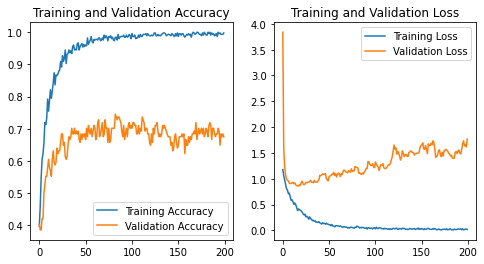

In [40]:
##################
#
#  Model04 ResNet101V2

from keras.callbacks import ModelCheckpoint, EarlyStopping

start = datetime.datetime.now()
#for k in range(5):
k = 3
tf.keras.backend.clear_session()

model_name = "ResNet101V2"

checkpoint = ModelCheckpoint(path_checkpoint_dir+model_name+"_"+str(k+1) +".tf",
                             monitor='val_accuracy', # val_loss or val_accuracy
                             save_best_only=True, save_weights_only=False,
                             mode='max', # val_loss -> min , val_accuracy -> max
                             verbose=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

Xs_train, Xs_val, y_train, y_val = train_test_split(Xs, ys, test_size=0.2, random_state=2+k*10)
Xs_train.shape, Xs_val.shape

y_train_c = to_categorical(y_train, 3)
y_val_c = to_categorical(y_val, 3)
y_train_c.shape, y_val_c.shape

datagenflowAug = datagen.flow(Xs_train*255, y_train_c, 16, shuffle=True)
datagenflowNo = datagenNo.flow(Xs_val*255, y_val_c, 16, shuffle=True)

model04 = create_model("ResNet101V2", 3)
  
opt = Adam(learning_rate=0.00001)
model04.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

callbacks = [checkpoint]
history = model04.fit(datagenflowAug, validation_data=datagenflowNo, epochs=epochs, callbacks=callbacks)

end= datetime.datetime.now()
elapsed= end-start
print("Model", model_name," used Total time: ", elapsed, "seconds")

##################
#
# Plot training result

import os
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()